In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

In [2]:
data = pd.read_csv("C:/Users/user/Desktop/Data_analyst_course/Projects_Datasets/DataScience_salaries_2024.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [3]:
salaries = data.copy()
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [4]:
salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,14838.0,2023.138900,0.700799,2020.0,2023.0,2023.0,2024.0,2024.0
salary,14838.0,165022.718965,356235.426522,14000.0,102100.0,142200.0,187500.0,30400000.0
salary_in_usd,14838.0,149874.718763,69009.181349,15000.0,102000.0,141300.0,185900.0,800000.0
remote_ratio,14838.0,32.760480,46.488278,0.0,0.0,0.0,100.0,100.0


In [5]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [6]:
salaries[:].isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# the data is already clean an has no missing values

In [8]:
salaries.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              153
salary                2363
salary_currency         23
salary_in_usd         2730
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

In [9]:
print('Data avaliable from years: {}'.format(salaries['work_year'].unique()))

Data avaliable from years: [2021 2020 2022 2023 2024]


# Experience level analysis

In [10]:
experience_levels = salaries['experience_level'].value_counts()
experience_levels
# Entire, Mid, Senior, Expert

experience_level
SE    9696
MI    3553
EN    1148
EX     441
Name: count, dtype: int64

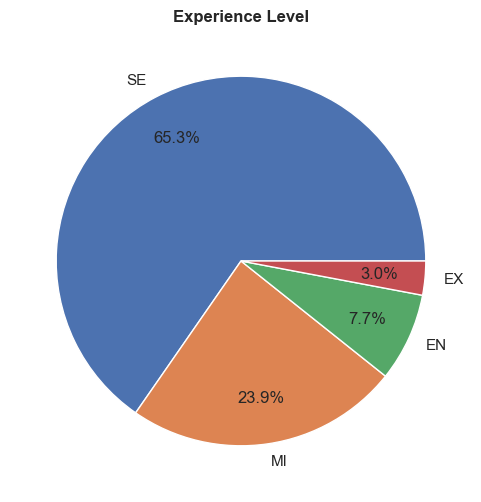

In [11]:
# Plotting the frequency of each experience level in the dataset:

plt.figure(figsize=(6,6))
plt.pie(experience_levels,
       labels=experience_levels.index,
        autopct='%1.1f%%',
        pctdistance=.75
       )
plt.title('Experience Level',
         weight='bold')
plt.show()

# Employment type analysis

In [12]:
employment_types = salaries['employment_type'].value_counts()
employment_types
# Full-Time, Part-Time, Constract, Freelance

employment_type
FT    14772
PT       27
CT       26
FL       13
Name: count, dtype: int64

In [13]:
print(f'{employment_types.values[0] / employment_types.values.sum() * 100}% of the employees are full-time employees') 

99.55519611807522% of the employees are full-time employees


# Remote working analysis

In [14]:
# First, we will check the distribution between the different remote work options:

remote_ratio = salaries['remote_ratio'].value_counts()
remote_ratio

remote_ratio
0      9853
100    4737
50      248
Name: count, dtype: int64

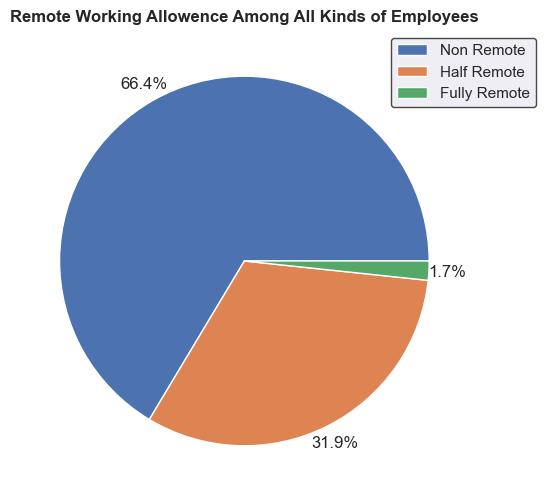

In [15]:
# Plotting results:

legends=['Non Remote', 'Half Remote', 'Fully Remote']
plt.figure(figsize=(6,6))
plt.pie(remote_ratio.values,
       autopct='%1.1f%%',
       pctdistance=1.1)
plt.legend(legends,
          edgecolor='k',
          bbox_to_anchor=(.8,1))
plt.title('Remote Working Allowence Among All Kinds of Employees',
         weight='bold')
plt.show()

In [16]:
# Now, within the group of employees who work full-time remotely, we will examine the distribution between the different levels of experience:

fully_remote_data = salaries[salaries['remote_ratio']==100] # Creating a df of fully-remote employees
fully_remote_data_experice_level = fully_remote_data['experience_level'].value_counts() # Counting each experiece level within the fully-remote employees
index = fully_remote_data_experice_level.index 
values = fully_remote_data_experice_level.values
for i, v in zip (index, values):
    print (f'{v} ({round(v/values.sum(), 2)}%) of the fully-remote employees are {i}')

3235 (0.68%) of the fully-remote employees are SE
998 (0.21%) of the fully-remote employees are MI
342 (0.07%) of the fully-remote employees are EN
162 (0.03%) of the fully-remote employees are EX


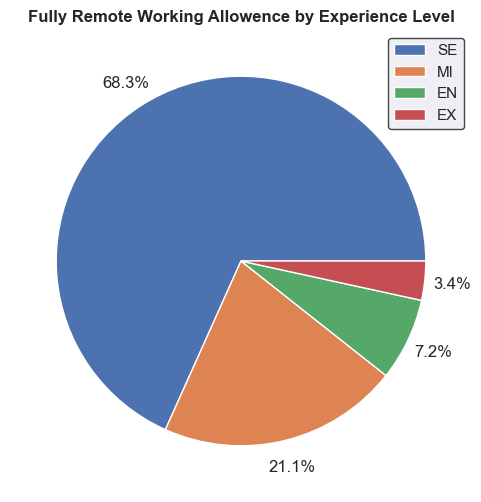

In [17]:
# Plotting results:

plt.figure(figsize=(6,6))
plt.pie(fully_remote_data_experice_level,
       autopct='%1.1f%%',
       pctdistance=1.15)
plt.legend(index,
          edgecolor='k')

plt.title('Fully Remote Working Allowence by Experience Level',
         weight='bold')
plt.show()

# Salaries Analysis

median: 141300.0 
mean: 149874.71876263648


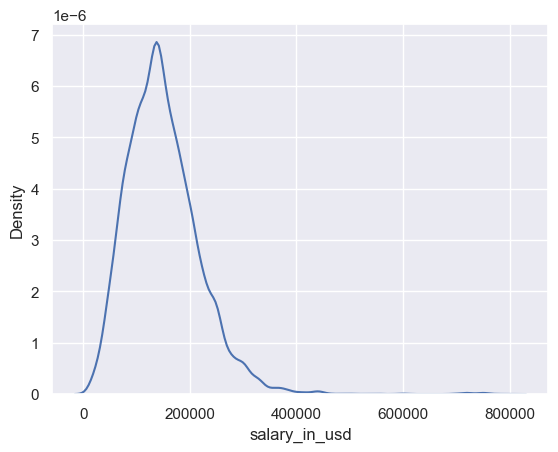

In [18]:
# Checking the salaries distribution:

sns.kdeplot(salaries['salary_in_usd'])

print('median:', salaries['salary_in_usd'].median(),'\n' 'mean:', salaries['salary_in_usd'].mean())

### Checking the average salary for each type of employment

In [19]:
employment_type_groups = salaries.groupby('employment_type') # Crearing employment type groups
print('Average salary for each employment type:')
employment_type_groups['salary_in_usd'].mean().sort_values(ascending=False)

Average salary for each employment type:


employment_type
FT    150175.764081
CT    112007.500000
PT     69608.037037
FL     50236.769231
Name: salary_in_usd, dtype: float64

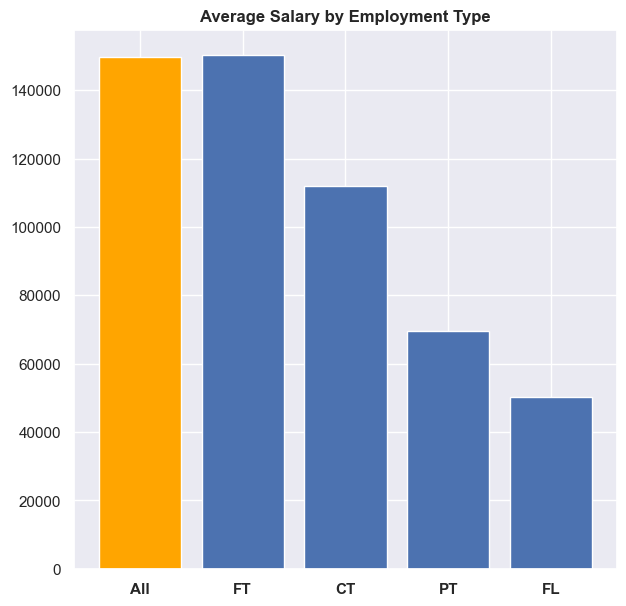

In [20]:
# Plotting results: 

plt.figure(figsize=(7,7))
general_avg_salary = salaries['salary_in_usd'].mean()
plt.bar(x='All',
        height=general_avg_salary,
       color='orange')
plt.xticks(weight='bold')
series = employment_type_groups['salary_in_usd'].mean().sort_values(ascending=False)
plt.bar(x=series.index,
        height=series.values,
       color='b')
plt.xticks(weight='bold')

plt.title('Average Salary by Employment Type',
          weight='bold')
plt.show()

#  Most common job titles

In [21]:
salaries['job_title'].value_counts().nlargest(20)

job_title
Data Engineer                     3162
Data Scientist                    3015
Data Analyst                      2189
Machine Learning Engineer         1542
Research Scientist                 475
Analytics Engineer                 403
Applied Scientist                  383
Data Architect                     369
Research Engineer                  276
Business Intelligence Engineer     230
Data Science                       205
Data Manager                       188
ML Engineer                        163
Business Intelligence Analyst      147
Machine Learning Scientist         124
Data Science Manager               114
Research Analyst                   107
AI Engineer                        105
BI Developer                        84
Data Science Consultant             79
Name: count, dtype: int64

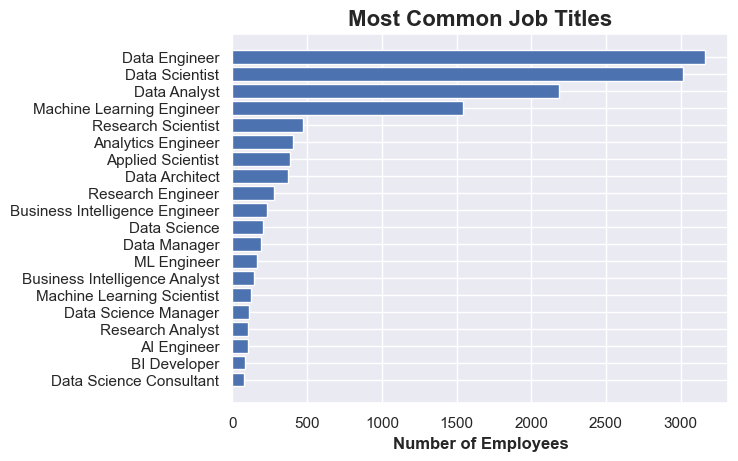

In [22]:
fig, ax = plt.subplots()

ax.barh(y=salaries['job_title'].value_counts().nlargest(20).sort_values(ascending=True).index,
       width=salaries['job_title'].value_counts().nlargest(20).sort_values(ascending=True).values)
ax.set_xlabel('Number of Employees', weight='bold')
ax.set_title('Most Common Job Titles', weight='bold', size=16)
plt.show()

##### We can clearly see that there are four main job titles.
##### let's check what is the percent of them within the entire market:

In [23]:
sum_top4 = salaries['job_title'].isin(salaries['job_title'].value_counts().nlargest(4).index).sum()
total_employess = salaries['job_title'].value_counts().sum()
share = round(sum_top4/total_employess*100,3)
print (sum_top4, "of the employees in the sample have one of the most common job titles, which are", share ,"% of the sample")

9908 of the employees in the sample have one of the most common job titles, which are 66.774 % of the sample


In [24]:
# let's look at the 10 most common job titles to create more clear classification:

sum_top10 = ((salaries['job_title'].isin(salaries['job_title'].value_counts().nlargest(10).index).sum()/ salaries['job_title'].count())*100).round(2)
sum_top10

81.17

In [25]:
print(sum_top10,'% of the employees are titled with one of the ten most common job titles' )

81.17 % of the employees are titled with one of the ten most common job titles


### Calculating the average salary of the most 10 common titles:

In [26]:
most_common_jt_data = salaries[salaries['job_title'].isin(salaries['job_title'].value_counts()[:10].index)] # Creating a df of the most common job titles
most_common_jt_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
9,2022,EN,FT,Research Engineer,5500000,JPY,41809,JP,50,JP,L
12,2021,SE,FT,Machine Learning Engineer,4900000,INR,66265,IN,0,IN,L


In [27]:
most_common_jt_data_groups = most_common_jt_data.groupby('job_title') # Creating groups of job title
most_common_jt_data_groups

In [28]:
most_common_jt_data_groups['salary_in_usd'].mean().sort_values(ascending=False)

job_title
Research Scientist                194217.117895
Applied Scientist                 190350.707572
Research Engineer                 190154.568841
Machine Learning Engineer         188014.814527
Data Architect                    163499.723577
Analytics Engineer                159616.397022
Data Scientist                    154179.810945
Data Engineer                     146780.174257
Business Intelligence Engineer    140673.973913
Data Analyst                      108031.788945
Name: salary_in_usd, dtype: float64

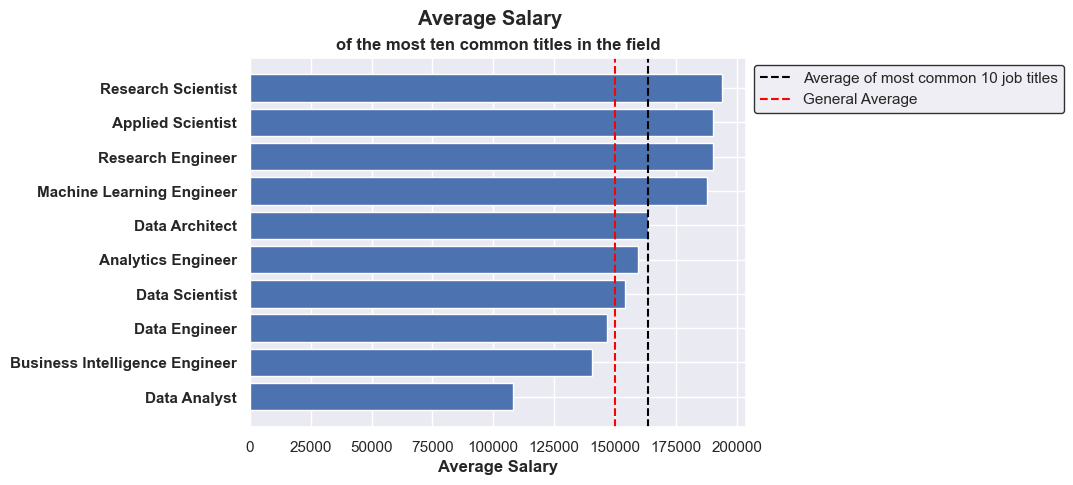

In [29]:
# Plotting results:

fig, ax = plt.subplots()

ax.barh(y=most_common_jt_data_groups['salary_in_usd'].mean().sort_values(ascending=True).index,
       width = most_common_jt_data_groups['salary_in_usd'].mean().sort_values(ascending=True).values)

ax.axvline(most_common_jt_data_groups['salary_in_usd'].mean().mean(),
          color='black',
          ls='--',
          label='Average of most common 10 job titles')
ax.axvline(salaries['salary_in_usd'].mean().mean(),
          color='red',
          ls='--',
          label='General Average')

ax.set_xlabel('Average Salary', weight='bold')
plt.yticks(weight='bold')

fig.suptitle('Average Salary', weight='bold')
ax.set_title('of the most ten common titles in the field', weight='bold')

ax.legend(bbox_to_anchor=(1,1),
         edgecolor='black')

plt.show()

### checking the salary trend over years, of the most 5 common job titles:

In [30]:
most_common_jt5 = salaries[salaries['job_title'].isin(salaries['job_title'].value_counts().nlargest(5).index)] # Creating a df of the most 5 common job titles only
most_common_jt5

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
12,2021,SE,FT,Machine Learning Engineer,4900000,INR,66265,IN,0,IN,L
14,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
...,...,...,...,...,...,...,...,...,...,...,...
14824,2023,EN,FT,Data Scientist,18000,EUR,19434,GR,100,GR,L
14825,2023,EN,FT,Data Engineer,18000,USD,18000,IN,50,IN,M
14828,2024,EN,FT,Data Engineer,17598,USD,17598,MX,50,MX,L
14830,2023,EN,FT,Data Scientist,16000,USD,16000,EC,100,EC,L


In [31]:
 # Prepering the new data for plotting

salary_trends = most_common_jt5.pivot_table(index='job_title',
                           columns='work_year',
                           values='salary',
                           aggfunc='mean')
salary_trends

work_year,2020,2021,2022,2023,2024
job_title,,,,,
Data Analyst,58500.000000,1.398728e+05,107969.198529,111020.992101,107032.035200
Data Engineer,471638.384615,2.028601e+05,143899.057377,150428.070194,145939.647668
Data Scientist,744633.809524,1.138821e+06,182927.190594,165130.957335,149262.935638
Machine Learning Engineer,144500.000000,4.456689e+05,164614.240741,190342.560041,196259.876682
Research Scientist,246000.000000,8.678990e+04,140756.666667,188649.146853,214740.635802


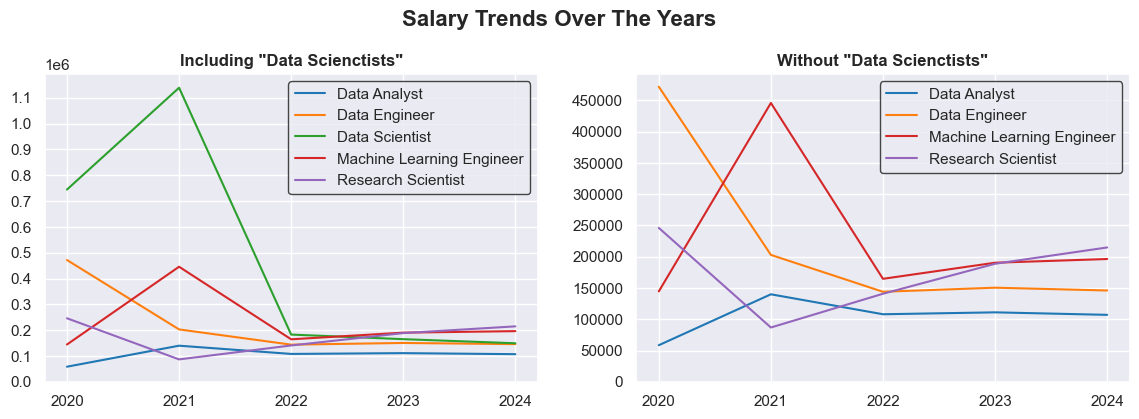

In [32]:
# Creating a color map in order to keep the colors within both of the coming graphs.

indices = salary_trends.index
colors = plt.cm.tab10(range(len(indices)))
color_map = dict(zip(indices, colors))

# Creatingn a plot:
fig, ax = plt.subplots(1,2, figsize=(14,4))
for i in salary_trends.index:
    ax[0].plot(salary_trends.loc[i],
              color=color_map[i])
ax[0].legend(salary_trends.index,
            edgecolor='k')
ax[0].set_xticks(salary_trends.columns)
ax[0].set_title('Including "Data Scienctists"',
               weight='bold')
ax[0].set_yticks(range(0, 1100001, 100000))

salary_trends_dropped = salary_trends.drop(index='Data Scientist').index
for i in salary_trends_dropped:
    ax[1].plot(salary_trends.loc[i],
              color=color_map[i])
ax[1].legend(salary_trends_dropped,
            edgecolor='k')
ax[1].set_xticks(salary_trends.columns)
ax[1].set_title('Without "Data Scienctists"',
               weight='bold')
ax[1].set_yticks(np.arange(0, 460000, 50000))

fig.text(s='Salary Trends Over The Years',
        x=0.38, y=1, weight='bold',
        size=16)


plt.show()

# Experience level analysis (among the common job titles)

In [33]:
most_common_jt_data['experience_level'].value_counts()

experience_level
SE    8266
MI    2687
EN     846
EX     245
Name: count, dtype: int64

#### within the common job titles, let's check the prevalence of the different experience levels:

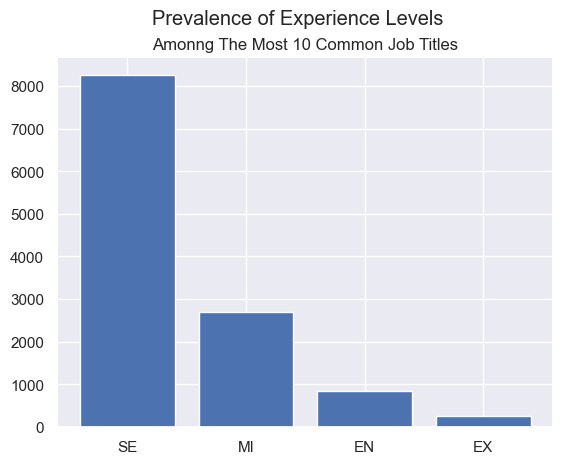

In [34]:
fig, ax = plt.subplots()
ax.bar(x=most_common_jt_data['experience_level'].value_counts().index,
       height=most_common_jt_data['experience_level'].value_counts().values)
fig.suptitle('Prevalence of Experience Levels')
ax.set_title('Amonng The Most 10 Common Job Titles')
plt.show()

#### The average salary of each experince level, among the 10 most common job titles:

In [35]:
experience_level_groups = most_common_jt_data.groupby('experience_level')
experience_level_groups

In [36]:
avg_per_exp = experience_level_groups['salary_in_usd'].mean().sort_values()
general_avg = avg_per_exp.mean()

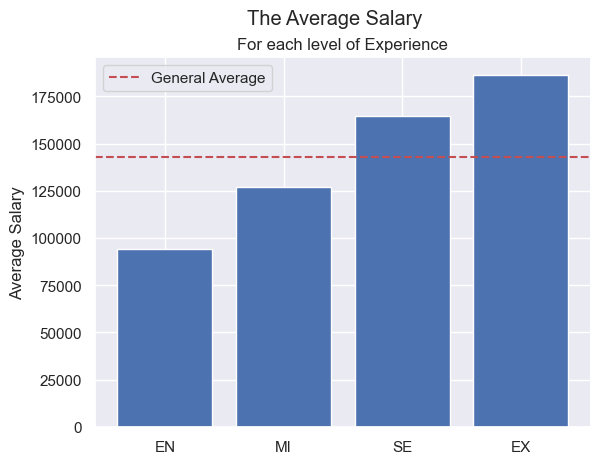

In [37]:
fig, ax = plt.subplots()
ax.bar(avg_per_exp.index,
       avg_per_exp.values)
ax.axhline(general_avg,
           ls='--',
           color='r',
          label='General Average')

ax.set_ylabel('Average Salary')

fig.suptitle('The Average Salary')
ax.set_title('For each level of Experience')

ax.legend()
plt.show()

#### for each title from the most common job titles, les't check the prevalenve of each experience level:

In [38]:
freq_of_exp = pd.DataFrame(most_common_jt_data_groups['experience_level'].value_counts()) # Counting appearances of experience level
freq_of_exp = freq_of_exp.reset_index().pivot(index='job_title',
                        columns='experience_level',
                        values='count') # Prepearing data for analysis
# Table virsion:
freq_of_exp['Total'] = freq_of_exp.sum(axis=1)
freq_of_exp

experience_level,EN,EX,MI,SE,Total
job_title,,,,,
Analytics Engineer,12.0,12.0,92.0,287.0,403.0
Applied Scientist,14.0,NaN,80.0,289.0,383.0
Business Intelligence Engineer,NaN,6.0,40.0,184.0,230.0
Data Analyst,452.0,22.0,526.0,1189.0,2189.0
Data Architect,NaN,4.0,23.0,342.0,369.0
Data Engineer,123.0,145.0,809.0,2085.0,3162.0
Data Scientist,134.0,37.0,702.0,2142.0,3015.0
Machine Learning Engineer,49.0,16.0,234.0,1243.0,1542.0
Research Engineer,31.0,NaN,67.0,178.0,276.0


In [39]:
freq_of_exp.sum()

experience_level
EN         846.0
EX         245.0
MI        2687.0
SE        8266.0
Total    12044.0
dtype: float64

In [40]:
freq_of_exp_to_chart = pd.DataFrame(most_common_jt_data_groups['experience_level'].value_counts(normalize=True)).reset_index()
freq_of_exp_to_chart

,job_title,experience_level,proportion
0,Analytics Engineer,SE,0.712159
1,Analytics Engineer,MI,0.228288
2,Analytics Engineer,EX,0.029777
3,Analytics Engineer,EN,0.029777
4,Applied Scientist,SE,0.754569
5,Applied Scientist,MI,0.208877
6,Applied Scientist,EN,0.036554
7,Business Intelligence Engineer,SE,0.800000
8,Business Intelligence Engineer,MI,0.173913
9,Business Intelligence Engineer,EX,0.026087


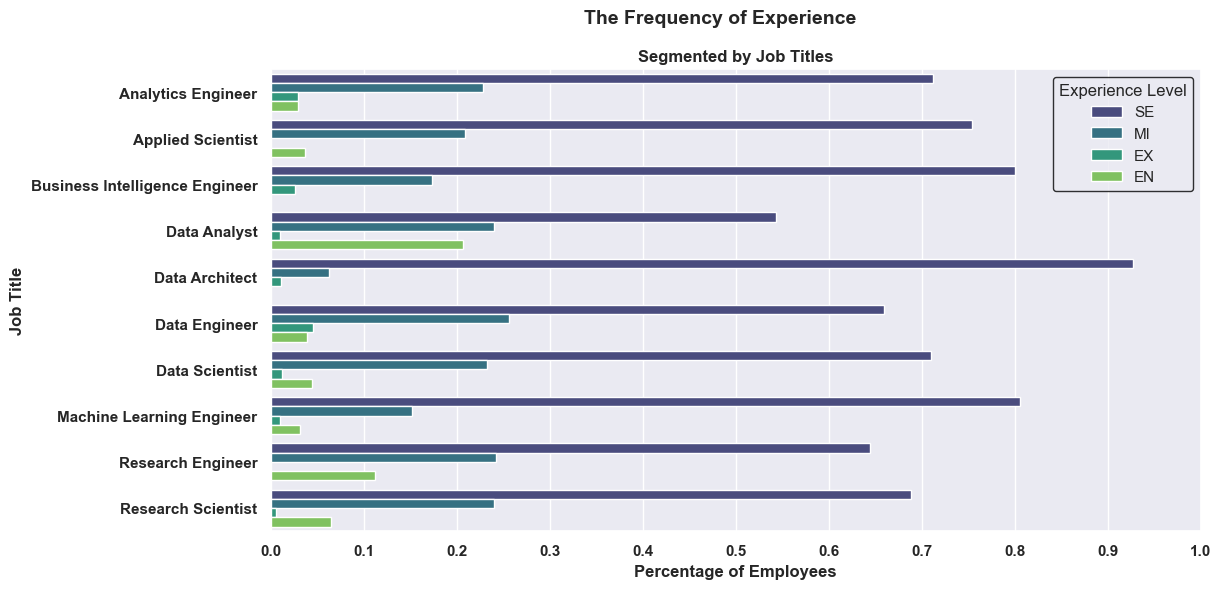

In [41]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(y='job_title',
           x='proportion',
           data=freq_of_exp_to_chart,
           hue='experience_level',
           palette='viridis')

ax.set_xticks(np.arange(0, 1.01, 0.1))
plt.xticks(weight='bold')
plt.yticks(weight='bold')
ax.set_xlabel('Percentage of Employees', weight='bold')
ax.set_ylabel('Job Title', weight='bold')

ax.legend(title = 'Experience Level', 
         edgecolor='black')

fig.suptitle('The Frequency of Experience', weight='bold', size=14)
ax.set_title('Segmented by Job Titles', weight='bold')
plt.show()

#### The average salary for each job title, segmented by experience level

In [42]:
JtElSa = most_common_jt_data[['job_title', 'experience_level', 'salary_in_usd']]
order = ['EN', 'MID', 'SE', 'EX']
JtElSa = JtElSa.sort_values(by='experience_level')
JtElSa

,job_title,experience_level,salary_in_usd
14836,Data Analyst,EN,15000
12338,Data Analyst,EN,85500
12349,Data Analyst,EN,85420
12352,Data Analyst,EN,85256
12358,Data Analyst,EN,85000
...,...,...,...
7530,Data Scientist,SE,140250
7529,Data Scientist,SE,140300
7528,Data Scientist,SE,140400
7542,Data Analyst,SE,140130


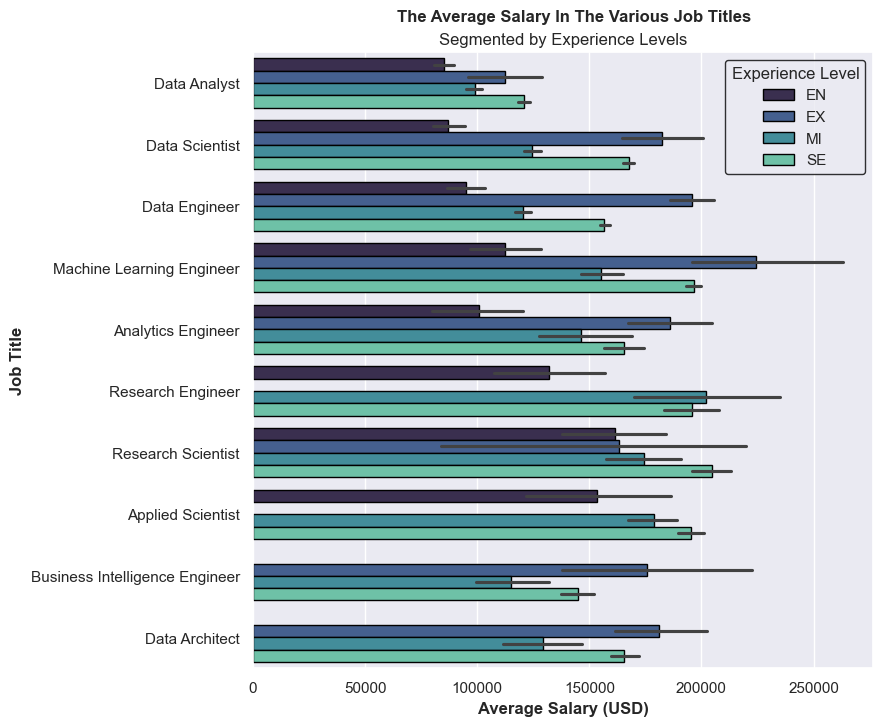

In [43]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(y='job_title',
           x='salary_in_usd',
           data=JtElSa,
           hue='experience_level',
           palette = 'mako',
           edgecolor='black')

ax.set_xlabel('Average Salary (USD)', weight='bold')
ax.set_ylabel('Job Title', weight='bold')
ax.text(s='The Average Salary In The Various Job Titles',
        x=64000, y=-1, weight='bold')
ax.set_title('Segmented by Experience Levels')

ax.legend(title = 'Experience Level', 
         edgecolor='black')

plt.show()

#  Location Analysis - where do the data employees live? 

In [44]:
(salaries['company_location'].value_counts()>=20).sum() # checking how many places appear more than 20 times in the dataset

11

In [45]:
salaries['company_location'].value_counts().nlargest(11).index # checking out the names of these plces

Index(['US', 'GB', 'CA', 'ES', 'DE', 'FR', 'IN', 'AU', 'NL', 'PT', 'BR'], dtype='object', name='company_location')

In [46]:
most_common_locations_data = salaries[salaries['company_location'].isin(salaries['company_location'].value_counts().nlargest(11).index)] # creating a new df which contains data only from places appear more than 20 times in the original data
location_counts = most_common_locations_data['company_location'].value_counts(normalize=True)*100 # Counting each place appearances
location_counts.head()

company_location
US    89.501276
GB     4.518176
CA     2.704008
ES     0.876043
DE     0.676002
Name: proportion, dtype: float64

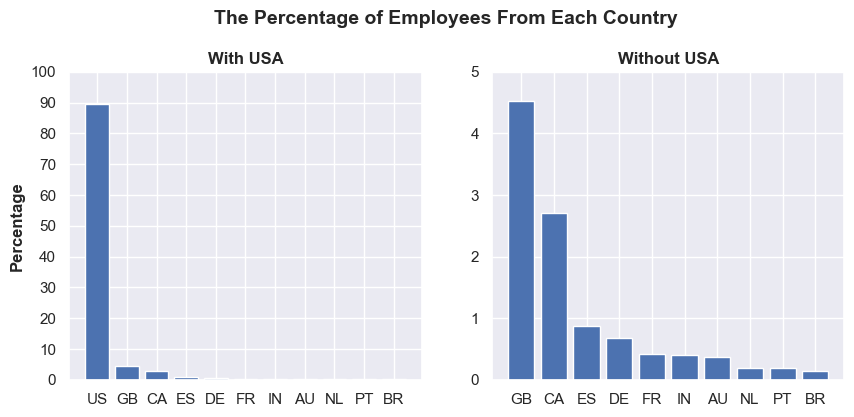

In [47]:
# Plotting results:

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].bar(x=location_counts.index,
      height=location_counts.values)
ax[0].set_yticks(np.arange(0, 101, 10))
ax[0].set_title('With USA', weight='bold')
ax[0].set_ylabel('Percentage', weight='bold')

ax[1].bar(x=location_counts.index[1:],
         height=location_counts.values[1:])
ax[1].set_yticks(np.arange(0, 5.1, 1))
ax[1].set_title('Without USA', weight='bold')

fig.text(s='The Percentage of Employees From Each Country',
        x=0.27, y=1, size=14, weight='bold')
plt.show()

In [48]:
salaries['company_location'].value_counts(normalize=True)
us = salaries['company_location'].value_counts(normalize=True).iloc[0] # Calculating the precentage of US in the data
other = salaries['company_location'].value_counts(normalize=True).iloc[1:].sum() # Calculating the percentage of the other places in the data

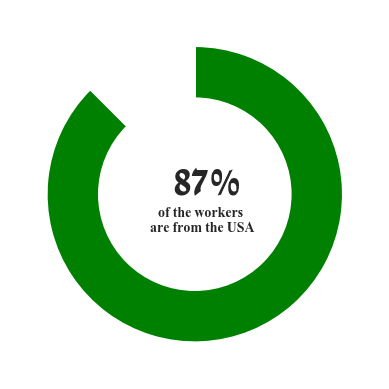

In [49]:
fig, ax = plt.subplots()

ax.pie([us, 1-us],
      colors=['green', 'white'],
      startangle=135)

cir = plt.Circle((0,0), .65, color='white')

plt.gca().add_artist(cir)
ax.text(s='87%',
       x=-.15, y=0,
       size=30, weight='bold', font='david')
ax.text(s='of the workers',
       x=-.25, y=-.15,
       size=10, weight='bold', font='david')
ax.text(s='are from the USA',
       x=-.3, y=-.25,
        size=10, weight='bold', font='david')

plt.show()

In [50]:
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


# Machine Learning Appliaction - Salary Prediction

In [51]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [52]:
for column in salaries.columns:
    print(f'Values count: {salaries[column].value_counts()}\n')

Values count: work_year
2023    8519
2024    4374
2022    1652
2021     218
2020      75
Name: count, dtype: int64

Values count: experience_level
SE    9696
MI    3553
EN    1148
EX     441
Name: count, dtype: int64

Values count: employment_type
FT    14772
PT       27
CT       26
FL       13
Name: count, dtype: int64

Values count: job_title
Data Engineer                      3162
Data Scientist                     3015
Data Analyst                       2189
Machine Learning Engineer          1542
Research Scientist                  475
                                   ... 
Deep Learning Researcher              1
Big Data Developer                    1
AWS Data Architect                    1
Staff Machine Learning Engineer       1
CRM Data Analyst                      1
Name: count, Length: 153, dtype: int64

Values count: salary
150000    316
100000    306
130000    281
160000    257
120000    246
         ... 
154700      1
154818      1
155175      1
155400      1
14000       

In [53]:
#Since I have to use one-hot encoding, I have to set a minimum threshold for the number of occurrences of each unique value, in order for each such
# value to appear in both the training set and the test set.

In [54]:
model_data = salaries.copy()

for column in model_data.columns:
    value_counts = model_data[column].value_counts()
    model_data = model_data[model_data[column].isin(value_counts[value_counts >= 10].index)] # Choosing only values appear more than 10 times in the dataset

model_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
104,2024,MI,FT,Research Engineer,440000,USD,440000,US,0,US,M
105,2024,MI,FT,Research Engineer,440000,USD,440000,US,0,US,M
106,2024,MI,FT,ML Engineer,440000,USD,440000,US,0,US,M
107,2024,MI,FT,Research Engineer,440000,USD,440000,US,0,US,M
108,2024,SE,FT,Research Scientist,440000,USD,440000,US,0,US,M


In [55]:
for column in model_data.columns:
    print('Values count:' , model_data[column].value_counts())

Values count: work_year
2023    5831
2024    2600
2022    1014
2021      72
2020      19
Name: count, dtype: int64
Values count: experience_level
SE    6414
MI    2318
EN     546
EX     258
Name: count, dtype: int64
Values count: employment_type
FT    9520
CT       7
PT       7
FL       2
Name: count, dtype: int64
Values count: job_title
Data Engineer                 2167
Data Scientist                1966
Data Analyst                  1392
Machine Learning Engineer      930
Research Scientist             319
                              ... 
Data Operations Specialist       4
Applied Data Scientist           2
Lead Data Scientist              2
Head of Data Science             2
Big Data Engineer                2
Name: count, Length: 69, dtype: int64
Values count: salary
150000    298
100000    276
130000    272
160000    246
140000    231
         ... 
131200     10
97000      10
255000      9
42000       1
54000       1
Name: count, Length: 252, dtype: int64
Values count: salary_cu

In [56]:
target = model_data['salary_in_usd']
features = model_data.drop(columns=[ 'salary_in_usd'])

In [57]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=.2)

In [58]:
ct = ColumnTransformer([
    ('ONE', OneHotEncoder(), ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']),
    ('StandardScaler', StandardScaler(), ['work_year', 'salary'])
]) # Setting up a ColumnTransformer that contains a OneHotEncoder and StandardScaler to prepare the data for fitting the model 


In [59]:
x_train_transformed = ct.fit_transform(x_train)
x_test_transformed = ct.transform(x_test)

In [60]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(Ridge(), 
                    param_grid = params) # פerforming a Grid Search Cross-Validation for Hyperparameter Optimization


grid.fit(x_train_transformed, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1]})

In [61]:
grid.best_params_

{'alpha': 0.0001}

In [62]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_train_transformed, y_train) # fitting the model with the best parameters

Ridge(alpha=0.01)

In [63]:
ridge_pred = ridge.predict(x_test_transformed)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error
MAE = mean_absolute_error

In [65]:
# Evaluating the model:

print(f'train model score: {ridge.score(x_train_transformed, y_train)}')
print(f'test model score: {ridge.score(x_test_transformed, y_test)}')
print(f'the model MSE score: {MSE(y_test, ridge_pred)}')
print(f'the model MAE score: {MAE(y_test, ridge_pred)}')

train model score: 0.9998158326201468
test model score: 0.9997470059856809
the model MSE score: 882516.8692383453
the model MAE score: 202.205534362241


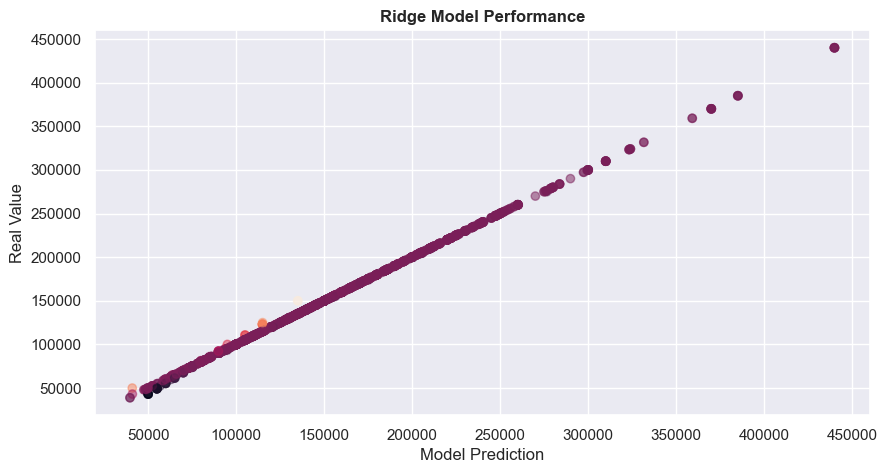

In [66]:
# Visualizing model performance:

plt.figure(figsize=(10,5))
plt.scatter(ridge_pred,
            y_test,
            alpha=.5,
           c=(y_test - ridge_pred))
plt.xlabel('Model Prediction')
plt.ylabel('Real Value')
plt.title('Ridge Model Performance', weight='bold')
plt.show()